In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

170498071/170498071 [==============================] - 21s 0us/step
Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


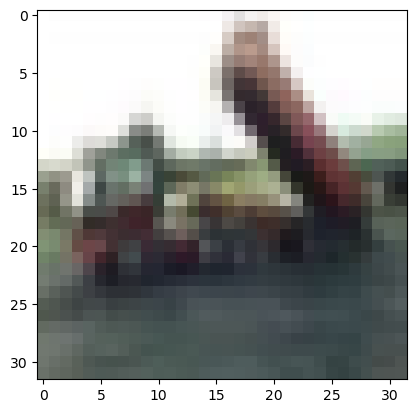

In [4]:
plt.imshow(xtrain[2],cmap='gray')

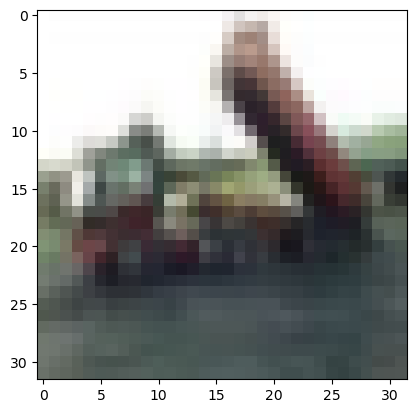

In [9]:
plt.imshow(xtrain[2],cmap='gray_r')

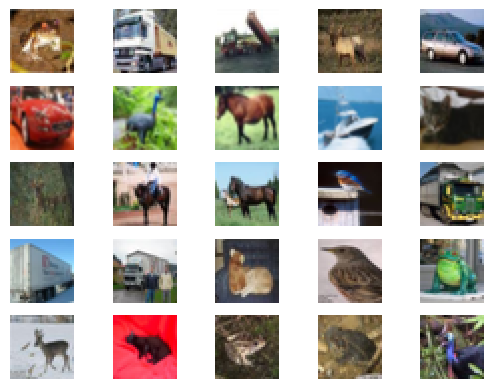

In [8]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [7]:
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [10]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
   
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Flatten())
    
    
    model.add(Dense(1,activation='sigmoid'))
    
    
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [11]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [12]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [13]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
   
    y=ones((n_samples,1))
    return x,y

In [14]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.64705884],
           [0.7490196 ],
           [0.89411765]],
 
          [[0.6431373 ],
           [0.74509805],
           [0.8862745 ]],
 
          [[0.6509804 ],
           [0.7529412 ],
           [0.89411765]],
 
          ...,
 
          [[0.8392157 ],
           [0.9254902 ],
           [0.99215686]],
 
          [[0.84313726],
           [0.93333334],
           [0.9882353 ]],
 
          [[0.8627451 ],
           [0.9490196 ],
           [1.        ]]],
 
 
         [[[0.6509804 ],
           [0.7529412 ],
           [0.8862745 ]],
 
          [[0.64705884],
           [0.7490196 ],
           [0.8784314 ]],
 
          [[0.654902  ],
           [0.75686276],
           [0.8901961 ]],
 
          ...,
 
          [[0.84705883],
           [0.92156863],
           [0.9882353 ]],
 
          [[0.8509804 ],
           [0.92941177],
           [0.9843137 ]],
 
          [[0.8666667 ],
           [0.94509804],
           [1.        ]]],
 
 
         [[[0.654902  ],

In [15]:
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
    #generate fake class labels
    y=zeros((n_samples,1))
    
    return x,y

In [16]:
generate_fake_samples(10)

(array([[[[0.73360587, 0.04986921, 0.82712664],
          [0.8833317 , 0.87406271, 0.9860569 ],
          [0.48167007, 0.29465817, 0.14285058],
          ...,
          [0.1393463 , 0.63713932, 0.30596477],
          [0.10779996, 0.027748  , 0.65538923],
          [0.2500872 , 0.99128126, 0.13423639]],
 
         [[0.58213816, 0.31831717, 0.74331353],
          [0.59476411, 0.68474819, 0.43445685],
          [0.06385994, 0.10287432, 0.58240529],
          ...,
          [0.54487322, 0.44239082, 0.73022379],
          [0.93615053, 0.23218214, 0.62684186],
          [0.08916866, 0.43278644, 0.90073653]],
 
         [[0.41607803, 0.8087547 , 0.43095954],
          [0.92329166, 0.93124226, 0.88754287],
          [0.0288692 , 0.69089949, 0.71904029],
          ...,
          [0.17316323, 0.51148602, 0.72759703],
          [0.52199542, 0.72116338, 0.97425211],
          [0.47252841, 0.98413412, 0.0467268 ]],
 
         ...,
 
         [[0.76985334, 0.42014592, 0.31752761],
          [0.06460

In [17]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
       
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
        
        xfake,yfake=generate_fake_samples(half_batch)
        
        
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [18]:
model=discriminator()


dataset=load_real_samples()

In [19]:
train_discriminative(model,dataset)

>1 real=64% fake=20%
>2 real=82% fake=16%
>3 real=78% fake=22%
>4 real=76% fake=23%
>5 real=78% fake=22%
>6 real=62% fake=30%
>7 real=62% fake=28%
>8 real=67% fake=35%
>9 real=57% fake=41%
>10 real=57% fake=45%
>11 real=57% fake=57%
>12 real=49% fake=58%
>13 real=47% fake=52%
>14 real=48% fake=54%
>15 real=49% fake=52%
>16 real=48% fake=63%
>17 real=46% fake=71%
>18 real=48% fake=73%
>19 real=38% fake=66%
>20 real=41% fake=70%
>21 real=40% fake=73%
>22 real=46% fake=73%
>23 real=45% fake=80%
>24 real=41% fake=79%
>25 real=32% fake=77%
>26 real=41% fake=82%
>27 real=41% fake=84%
>28 real=33% fake=89%
>29 real=35% fake=88%
>30 real=34% fake=87%
>31 real=34% fake=88%
>32 real=34% fake=84%
>33 real=42% fake=88%
>34 real=42% fake=91%
>35 real=37% fake=88%
>36 real=34% fake=94%
>37 real=35% fake=93%
>38 real=44% fake=95%
>39 real=39% fake=93%
>40 real=46% fake=95%
>41 real=34% fake=96%
>42 real=31% fake=95%
>43 real=52% fake=96%
>44 real=42% fake=97%
>45 real=38% fake=100%
>46 real=43% fake=

In [20]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
   
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [21]:
latent_dim = 100
model = generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [22]:
import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
   
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [23]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 485ms/step


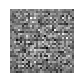

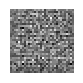

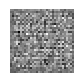

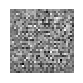

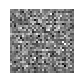

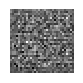

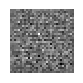

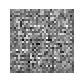

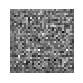

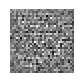

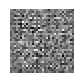

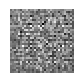

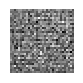

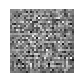

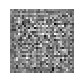

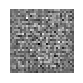

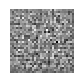

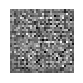

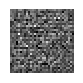

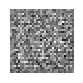

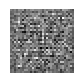

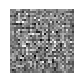

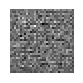

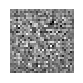

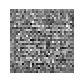

In [24]:
latent_dim = 100
model = generator(latent_dim)
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    plt.show()